# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries

import pandas as pd
import os
import numpy as np
import re
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

import plotly.graph_objs as go
import plotly.plotly as py
#import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)


In [2]:

# Set column width to max for viewing
pd.set_option('max_colwidth', 200)

In [132]:

# locate file path of message and categories files

def find_files(directory, extension):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                file_list.append(os.path.join(root, file))
    return file_list

# Specify the directory and file extension you want to search for
directory = '.'  # current work directory
extension = '.csv'  # Example file extension

# Call the function to find files
files = find_files(directory, extension)
print(files)

for file in files:
    if "disaster_messages" in str(file):
        message_filepath = file
    if "disaster_categories" in str(file):
        categories_filepath = file

#print(message_filepath, '\n', categories_filepath)


['.\\categories.csv', '.\\messages.csv']


In [133]:
# load messages dataset

messages = pd.read_csv(f'{message_filepath}')

print('File Layout:', '\n')
messages.info()      


File Layout: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
id          26248 non-null int64
message     26248 non-null object
original    10184 non-null object
genre       26248 non-null object
dtypes: int64(1), object(3)
memory usage: 820.3+ KB


In [134]:
# view dataset

messages[['id', 'message','genre']].head(15)

,id,message,genre
0,2,Weather update - a cold front from Cuba that could pass over Haiti,direct
1,7,Is the Hurricane over or is it not over,direct
2,8,Looking for someone but no name,direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
4,12,"says: west side of Haiti, rest of the country today and tonight",direct
5,14,Information about the National Palace-,direct
6,15,Storm at sacred heart of jesus,direct
7,16,"Please, we need tents and water. We are in Silo, Thank you!",direct
8,17,"I would like to receive the messages, thank you",direct
9,18,I am in Croix-des-Bouquets. We have health issues. They ( workers ) are in Santo 15. ( an area in Croix-des-Bouquets ),direct


In [135]:
# load categories dataset

categories = pd.read_csv(f'{categories_filepath}')

print('File Layout:', '\n')
categories.info()      


File Layout: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
id            26248 non-null int64
categories    26248 non-null object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


In [136]:
# view categories dataset

categories[['id', 'categories']].head(10)

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
1,7,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
2,8,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
3,9,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
4,12,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
5,14,related-0;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
6,15,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
7,16,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-1;food-0;shelter-1;clothing-0;money-0;missing_people-0;ref...
8,17,related-0;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...
9,18,related-1;request-1;offer-0;aid_related-1;medical_help-1;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;ref...


In [137]:

categories['categories'].unique()[0]

'related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0'

In [138]:
print('Unique Messages ID:', messages['id'].nunique())
print('Unique Categories ID:', categories['id'].nunique())

Unique Messages ID: 26180
Unique Categories ID: 26180


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [139]:
# merge datasets, check unique multiple IDs

df = messages.merge(categories, on='id')
print(df.shape, df['id'].nunique())
df.info()

(26386, 5) 26180
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 5 columns):
id            26386 non-null int64
message       26386 non-null object
original      10246 non-null object
genre         26386 non-null object
categories    26386 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [140]:
# view merged datasets

df[['id','genre','original','categories']].head()
df[['id','genre','original','message']].head()
df.loc[df.original.isnull(), ['id','genre','original','message']].head(15)

,id,genre,original,message
7483,8365,direct,NaN,NOTES: It mark as not enough information
9956,11186,social,NaN,My thoughts and prayers go out to all the lives that were affected today by the earthquake in Haiti. I will keep you all in my prayers!
9957,11188,social,NaN,I m sorry for the poor people in Haiti tonight. That being said I d love to experience an earthquake just once. In a big field of course.
9958,11189,social,NaN,RT selenagomez UNICEF has just announced an emergency alert for the people of Haiti who were hit by a 7.0 earthquake and a tsunami.. ..
9959,11192,social,NaN,lilithia yes 5.2 magnitude earthquake hit manila philippines last night.
9960,11193,social,NaN,RT TheNewsBlotter RT caribnews On Call International opens #Haiti earthquake emergency hotline for those with families friends in r ..
9961,11195,social,NaN,Most Eureka homeowners won&#39 t collect on quake insurance The California Earthquake Authority does not expec. http bit.ly 7RY2qT
9962,11196,social,NaN,Haiti hit by largest earthquake in over 200 years AP AP The strongest earthquake in more than 200 years .. http ow.ly 16kgyd
9963,11197,social,NaN,RT pinkelephantpun Earthquake Relief Donate http bit.ly 67t0d0 Select Immediate Needs to help those affected by today s earthquake.
9964,11198,social,NaN,Praying that today s earthquake in #Haiti minimally affected Franceli s orphanage. &lt 3


In [141]:
# nulls in original column
print(df.groupby('genre')['original'].apply(lambda x: x.isnull().sum()))

# nulls in message column
print(df.groupby('genre')['message'].apply(lambda x: x.isnull().sum()))

genre
direct      606
news      13128
social     2406
Name: original, dtype: int64
genre
direct    0
news      0
social    0
Name: message, dtype: int64


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [142]:

# create a dataframe of the 36 individual category columns

categories = df['categories'].str.split(';',expand=True)
print('File Layout of 36 columns:', '\n',categories.info())
categories.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 36 columns):
0     26386 non-null object
1     26386 non-null object
2     26386 non-null object
3     26386 non-null object
4     26386 non-null object
5     26386 non-null object
6     26386 non-null object
7     26386 non-null object
8     26386 non-null object
9     26386 non-null object
10    26386 non-null object
11    26386 non-null object
12    26386 non-null object
13    26386 non-null object
14    26386 non-null object
15    26386 non-null object
16    26386 non-null object
17    26386 non-null object
18    26386 non-null object
19    26386 non-null object
20    26386 non-null object
21    26386 non-null object
22    26386 non-null object
23    26386 non-null object
24    26386 non-null object
25    26386 non-null object
26    26386 non-null object
27    26386 non-null object
28    26386 non-null object
29    26386 non-null object
30    26386 non-null object
31    26386 non-null ob

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [143]:

# select the first row of the categories dataframe

row = categories.loc[0]
print('Extracted 1st row:', row.tolist(),'\n')

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing

category_colnames = row.apply(lambda x: x[:-2]).tolist()
#[col.split('-')[0] for col in row.tolist()]
print('Extracted column names:', len(category_colnames), '\n', category_colnames)


Extracted 1st row: ['related-1', 'request-0', 'offer-0', 'aid_related-0', 'medical_help-0', 'medical_products-0', 'search_and_rescue-0', 'security-0', 'military-0', 'child_alone-0', 'water-0', 'food-0', 'shelter-0', 'clothing-0', 'money-0', 'missing_people-0', 'refugees-0', 'death-0', 'other_aid-0', 'infrastructure_related-0', 'transport-0', 'buildings-0', 'electricity-0', 'tools-0', 'hospitals-0', 'shops-0', 'aid_centers-0', 'other_infrastructure-0', 'weather_related-0', 'floods-0', 'storm-0', 'fire-0', 'earthquake-0', 'cold-0', 'other_weather-0', 'direct_report-0'] 

Extracted column names: 36 
 ['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_relat

In [144]:
# rename the columns of `categories`

categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [145]:


for col in categories.columns:
    # set each value to be the last character of the string    
    categories[col] = categories[col].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories[col] = categories[col].astype(int)
    
    # Replace values greater than 1 with 1
    # categories[col] = categories[col].apply(lambda x: 1 if x > 1 else x)

print('Extracted Last Character Converted to Numeric:')
categories.head()



Extracted Last Character Converted to Numeric:


,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Inspection and EDA  is a crucial step in the data preprocessing phase. 

This section involves a thorough examination of the dataset to identify missing values, potential errors, and assess the distribution of category labels. This process is essential for ensuring data quality and addressing any issues before proceeding with model training or analysis.

In [146]:
# inspect unique values

print('Check Number of Unique and Missing Values:')

for col in categories.columns:
    if categories[col].nunique() > 2 or categories[col].nunique() == 1 or categories[col].isnull().sum() > 0:
        print(col, ':', categories[col].nunique(), ',',categories[col].isnull().sum())


Check Number of Unique and Missing Values:
related : 3 , 0
child_alone : 1 , 0


In [147]:
# inpsect column - related

categories['related'].value_counts()

1    20042
0     6140
2      204
Name: related, dtype: int64

**Note:  Value of 2 in "related" column will need  to be standardized in final clean-up to 1**

In [148]:
# inspect distribution of responsed by category labels

#print('% Categories Count:', '\n', categories.sum()/len(categories))
categories.describe().T


,count,mean,std,min,25%,50%,75%,max
related,26386.0,0.775032,0.435692,0.0,1.0,1.0,1.0,2.0
request,26386.0,0.171038,0.376549,0.0,0.0,0.0,0.0,1.0
offer,26386.0,0.004586,0.067564,0.0,0.0,0.0,0.0,1.0
aid_related,26386.0,0.415144,0.492756,0.0,0.0,0.0,1.0,1.0
medical_help,26386.0,0.079550,0.270600,0.0,0.0,0.0,0.0,1.0
medical_products,26386.0,0.049989,0.217926,0.0,0.0,0.0,0.0,1.0
search_and_rescue,26386.0,0.027477,0.163471,0.0,0.0,0.0,0.0,1.0
security,26386.0,0.017850,0.132410,0.0,0.0,0.0,0.0,1.0
military,26386.0,0.032707,0.177871,0.0,0.0,0.0,0.0,1.0
child_alone,26386.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


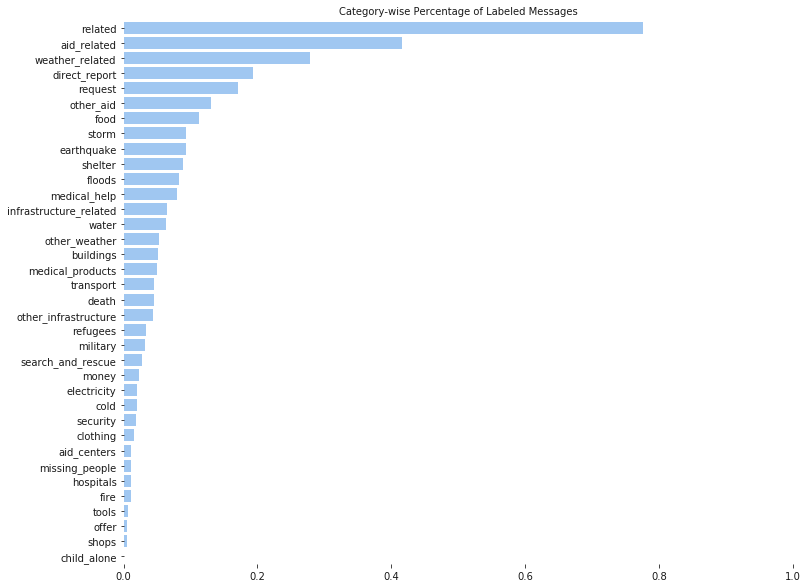

In [149]:

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

eda_temp = categories.describe().T.reset_index()
eda_temp.columns = ['category','freq','mean','std','min','q25','q50','q75','qmax']
#eda_temp.head()

sns.set_color_codes("pastel")
plot = sns.barplot(x="mean", y="category", data=eda_temp.sort_values(by='mean', ascending=False),
            label="", color="b", ax=ax)

# Add a informative axis label
ax.set_title('Category-wise Percentage of Labeled Messages', fontsize=10)
ax.set_xlabel("")  # Adjust the fontsize as needed
ax.set_ylabel("")  # Adjust the fontsize as needed
ax.tick_params(axis='y', labelsize=10) 
ax.set(xlim=(0, 1))
sns.despine(left=True, bottom=True)

plt.show()
# plt.savefig("\\Images\\barplot_catglabelpct.png")


In [150]:

# Sorting the DataFrame
eda_temp.sort_values(by='mean', ascending=True, inplace=True)

# Create the bar trace
trace = go.Bar(
    y=eda_temp_sorted['category'], 
    x=eda_temp_sorted['mean'], 
    orientation='h'
)

# Update layout for a more informative plot
layout = go.Layout(
    title = "Category-wise Percentage of Labeled Messages",
    width = 700,
    height = 800,
    xaxis = dict(
        title = ' ',
        #showgrid = False,
        zeroline = True,
        showline = True,
        showticklabels = True,
        gridwidth = 1
    ),
    yaxis = dict(
        #showgrid = True,
        zeroline = True,
        showline = True,
        #gridcolor = '#bdbdbd',
        #gridwidth = 2,
        #zerolinecolor = '#969696',
        #zerolinewidth = 2,
        #linecolor = '#636363',
        #linewidth = 2,
        title = '',
        titlefont = dict(
            family = 'Arial, sans-serif',
            size = 8,
            color = 'lightgrey'),    
        tickfont = dict(
            #family = 'Old Standard TT, serif',
            size = 8,
            color = 'black'))
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
iplot(fig)

In [151]:
# Convert the DataFrame to an HTML table
html_table = eda_temp.to_html(classes='table table-bordered table-striped', index=False)

display(HTML(html_table))

category,freq,mean,std,min,q25,q50,q75,qmax
child_alone,26386.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
shops,26386.0,0.004548,0.067286,0.0,0.0,0.0,0.0,1.0
offer,26386.0,0.004586,0.067564,0.0,0.0,0.0,0.0,1.0
tools,26386.0,0.006026,0.077394,0.0,0.0,0.0,0.0,1.0
fire,26386.0,0.010687,0.102828,0.0,0.0,0.0,0.0,1.0
hospitals,26386.0,0.010725,0.103009,0.0,0.0,0.0,0.0,1.0
missing_people,26386.0,0.011408,0.106197,0.0,0.0,0.0,0.0,1.0
aid_centers,26386.0,0.011711,0.107583,0.0,0.0,0.0,0.0,1.0
clothing,26386.0,0.015539,0.123684,0.0,0.0,0.0,0.0,1.0
security,26386.0,0.017850,0.132410,0.0,0.0,0.0,0.0,1.0


    index  count
0       0   6140
1       1   5141
2       3   3642
3       5   2983
4       4   2295
5       6   1919
6       7   1358
7       8    885
8       2    647
9       9    581
10     10    345
11     11    183
12     12    107
13     13     57
14     14     38
15     15     20
16     17     12
17     16      8
18     18      7
19     19      5
20     21      4
21     20      4
22     27      2
23     22      2
24     24      1


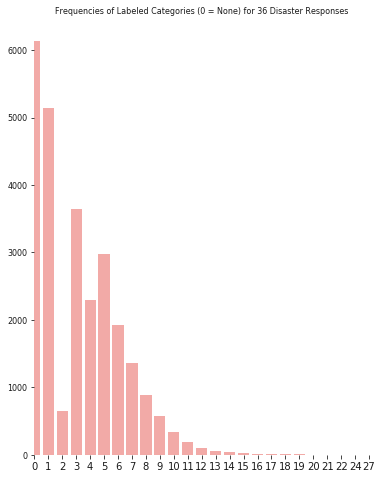

In [152]:

# inspect rows with no labels i.e.

nolabel_temp = pd.DataFrame(categories.sum(axis=1).value_counts()).reset_index()
nolabel_temp.columns = ['index', 'count']
print(nolabel_temp)

fig, ax = plt.subplots(figsize=(6, 8))

sns.set_color_codes("pastel")
sns.barplot(data=nolabel_temp, y='count', x='index',
            label="", color="r", ax=ax)

# Add a informative axis label
ax.set_title('Frequencies of Labeled Categories (0 = None) for 36 Disaster Responses', fontsize=8)
ax.set_xlabel("")  # Adjust the fontsize as needed
ax.set_ylabel("")  # Adjust the fontsize as needed
ax.tick_params(axis='y', labelsize=8) 
ax.set(xlim=(0, nolabel_temp.index.max()))
sns.despine(left=True, bottom=True)

plt.show()

#plt.savefig("barplot_freqwlabel.png")


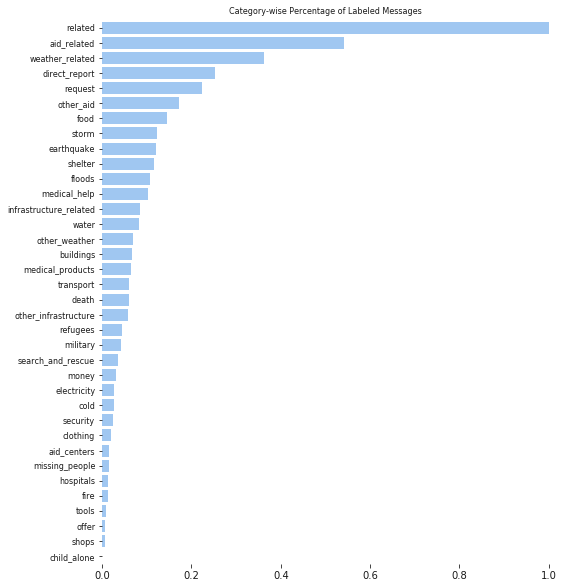

In [153]:
# inspect rows with missing labels and those with labels

#categories[categories.sum(axis=1) == 0].describe().T
#categories[categories.sum(axis=1) > 0].describe().T

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 10))

eda_wlabel = categories[categories.sum(axis=1) > 0].describe().T.reset_index()
eda_wlabel.columns = ['category','freq','mean','std','min','q25','q50','q75','qmax']
#eda_temp.head()

sns.set_color_codes("pastel")
plot = sns.barplot(x="mean", y="category", data=eda_wlabel.sort_values(by='mean', ascending=False),
            label="", color="b", ax=ax)

# Add a informative axis label
ax.set_title('Category-wise Percentage of Labeled Messages', fontsize=8)
ax.set_xlabel("")  # Adjust the fontsize as needed
ax.set_ylabel("")  # Adjust the fontsize as needed
ax.tick_params(axis='y', labelsize=8) 
ax.set(xlim=(0, 1))
sns.despine(left=True, bottom=True)

plt.show()
#plt.savefig("barplot_catgwlabelpct.png")


In [154]:

# Convert the DataFrame to an HTML table
html_table = eda_wlabel.to_html(classes='table table-bordered table-striped', index=False)

display(HTML(html_table))

category,freq,mean,std,min,q25,q50,q75,qmax
related,20246.0,1.010076,0.099875,1.0,1.0,1.0,1.0,2.0
request,20246.0,0.222908,0.416208,0.0,0.0,0.0,0.0,1.0
offer,20246.0,0.005976,0.077078,0.0,0.0,0.0,0.0,1.0
aid_related,20246.0,0.541045,0.498325,0.0,0.0,1.0,1.0,1.0
medical_help,20246.0,0.103675,0.304846,0.0,0.0,0.0,0.0,1.0
medical_products,20246.0,0.065149,0.246794,0.0,0.0,0.0,0.0,1.0
search_and_rescue,20246.0,0.035810,0.185820,0.0,0.0,0.0,0.0,1.0
security,20246.0,0.023264,0.150744,0.0,0.0,0.0,0.0,1.0
military,20246.0,0.042626,0.202017,0.0,0.0,0.0,0.0,1.0
child_alone,20246.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


**Note:  Remove rows with no labels in final clean-up to 1**  
  
In supervised learning, rows without labels are removed because they can't help the model learn and might even make it perform worse. These rows are missing the information the model needs to understand and get better.

In [155]:
# identify rows with no labels

nolabel_df = categories.copy()
nolabel_df['no_label'] = nolabel_df.apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)
nolabel_df.head()


,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,no_label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# inspect frequently occuring responses - related, request and aid_related

for col in ['related','aid_related','weather_related']:
    print(col, '\n', nolabel_df.groupby('no_label')[col].value_counts())

related 
 no_label  related
0         1          20042
          2            204
1         0           6140
Name: related, dtype: int64
aid_related 
 no_label  aid_related
0         1              10954
          0               9292
1         0               6140
Name: aid_related, dtype: int64
weather_related 
 no_label  weather_related
0         0                  12903
          1                   7343
1         0                   6140
Name: weather_related, dtype: int64


**Note:  "Related" column are all 1's or 2's when rows with no labels are remove.  Therefore this  column will  be dropped in the final clean-up to 1**  
  
It is practically reasonable and justifiable to eliminate 'related' from analysis. This is because the overwhelming prevalence of a single class offers little to no variability or informative value for predictive modeling or analysis.

In [157]:

# inspect extreme rare cases or  data with no variability

# Calculate the mean for each column
column_means = nolabel_df.mean()

# Calculate the mean for each column
column_std = nolabel_df.std()

remove_columns = list(set([col for col in column_means.index if (column_means[col] < 0.01 or column_means[col] > 0.9) ] + [col for col in column_std.index if column_std[col] <= 0.001]))
print(remove_columns)


['child_alone', 'shops', 'offer', 'tools']


**Note:  "Remove category columns with extreme rare cases or fully populated in the final clean-up to 1**  

**Note:  replace email, url,s and phones found in messages in the final clean-up**

In [158]:
# inspect for presence of URLS, phone numbers , and email addresses

# email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'

# url_pattern = r'https?://(?:www\.)?[\w.-]+\.\w{2,7}(?:/[\w/.-]*)?'
# text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
# url_string = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
phone_pattern =  r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'
email_pattern = r'[a-zA-Z0-9+_\-\.]+@[0-9a-zA-Z][.-0-9a-zA-Z]*.[a-zA-Z]+'


pattern_df = messages.copy()

def find_pattern(reg_exp, text):

    #detected_pattern = len(re.findall(reg_exp, text))
    #for url in detected_urls:
    #    text = text.replace(url, "urlplaceholder")
    
    return len(re.findall(reg_exp, text))

pattern_df['url'] = pattern_df['message'].apply(lambda x: find_pattern(url_pattern, x))
pattern_df['email'] = pattern_df['message'].apply(lambda x: find_pattern(email_pattern, x))
pattern_df['phone'] = pattern_df['message'].apply(lambda x: find_pattern(phone_pattern, x))
#len(re.findall(url_pattern, messages.loc[0,'message']))

pattern_df[['message', 'url']].head(25)
print(pattern_df['url'].value_counts())
print(pattern_df['email'].value_counts())
print(pattern_df['phone'].value_counts())

0    25578
1      563
2       80
3       23
4        2
6        1
5        1
Name: url, dtype: int64
0     26163
1        74
2         8
3         2
12        1
Name: email, dtype: int64
0    26246
1        2
Name: phone, dtype: int64


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.


#### Steps Applied to Prepare the Final Dataset:  

* Refine Category Data: Drop the old category column and merge the data with the categories dataset.  
* Dedupe Records: Remove any duplicate records to ensure the uniqueness and accuracy of our data.  
* Standardize Category Values: Standardize any category values exceeding 1 to 1 for consistency.  
* Eliminate Label-less Rows: Remove rows that lack labels, as they don't contribute to analysis.  
* Remove Unnecessary Columns: Eliminate columns that aren't needed for our analysis, e.g. 'original message', 
* Remove Outlier Category Columns: Eliminate category columns that represent extremely rare or overly common responses, focusing predictive models on more relevant data.  

**It's important to know that some data cleaning tasks are done before starting model training. These tasks are crucial but are not always part of the ETL (Extract, Transform, Load) process. Instead, they are key steps that need to be done right before training the model.**  
  

In [159]:

# add a no label column to flag records with missing labels

categories_split = categories.copy()
categories_split['no_label'] = categories_split.apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)

# drop the original categories column from `df`

clean_df = df.copy()
clean_df.drop('categories', axis=1, inplace=True)

print(categories_split.shape, clean_df.shape)

(26386, 37) (26386, 4)


In [160]:

# concatenate the original dataframe with the new `categories` dataframe

clean_df = pd.concat([clean_df, categories_split], axis=1)

print('Categories Columns Appended: ', clean_df.shape)
display(clean_df.head())


Categories Columns Appended:  (26386, 41)


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,no_label
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [161]:

# check number of duplicates
print('Number of duplicates records:', clean_df[clean_df.duplicated()].shape[0])

Number of duplicates records: 170


In [162]:
# drop duplicates

clean_df = clean_df.drop_duplicates()
print(clean_df.shape, clean_df.columns)
clean_df.info()

(26216, 41) Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report', 'no_label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26216 entries, 0 to 26385
Data columns (total 41 columns):
id                        26216 non-null int64
message                   26216 non-null object
original                  10170 non-null object
genre                     26216 non-null object
related                   26216 non-null int32
request                   2621

In [163]:
# confirm duplicates were removed
print('Number of duplicates records:', clean_df[clean_df.duplicated()].shape[0])

Number of duplicates records: 0


In [164]:
clean_df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,no_label
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# inspect rows with missing original messages

clean_df.loc[clean_df['original'].isnull(), ['message','no_label']].head()
print(clean_df[clean_df['original'].isnull()].groupby('genre')['related'].value_counts())
print(clean_df[clean_df['original'].isnull()].groupby('genre')['no_label'].value_counts())

genre   related
direct  1            539
        0             57
news    1          10671
        0           2365
        2             18
social  1           2053
        0            305
        2             38
Name: related, dtype: int64
genre   no_label
direct  0             539
        1              57
news    0           10689
        1            2365
social  0            2091
        1             305
Name: no_label, dtype: int64


In [168]:

# Drop rows where 'no_label' column equals 1, 
# Keeping the rows with missing labels for now but examine this during Machine Learning phase

# clean_df = clean_df[clean_df['no_label'] != 1]
# print(clean_df.shape)

In [166]:

# standardize category responses to 0 and 1

for col in clean_df.iloc[:,4:].columns:
  
    # Replace values greater than 1 with 1
    clean_df[col] = clean_df[col].apply(lambda x: 1 if x > 1 else x)

print(clean_df.shape)

(26216, 41)


In [167]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26216.0,15224.821330,8826.889140,2.0,7446.75,15662.5,22924.25,30265.0
related,26216.0,0.766478,0.423079,0.0,1.00,1.0,1.00,1.0
request,26216.0,0.170659,0.376218,0.0,0.00,0.0,0.00,1.0
offer,26216.0,0.004501,0.066940,0.0,0.00,0.0,0.00,1.0
aid_related,26216.0,0.414251,0.492602,0.0,0.00,0.0,1.00,1.0
medical_help,26216.0,0.079493,0.270513,0.0,0.00,0.0,0.00,1.0
medical_products,26216.0,0.050084,0.218122,0.0,0.00,0.0,0.00,1.0
search_and_rescue,26216.0,0.027617,0.163875,0.0,0.00,0.0,0.00,1.0
security,26216.0,0.017966,0.132831,0.0,0.00,0.0,0.00,1.0
military,26216.0,0.032804,0.178128,0.0,0.00,0.0,0.00,1.0


In [171]:

# inspect extreme rare cases or data with no variability
# examine this step during machine learning phase

# Calculate the mean for each column
#c olumn_means = clean_df.iloc[:, 4:].mean()

# Calculate the mean for each column
# column_std = clean_df.iloc[:, 4:].std()

# remove_columns = list(set([col for col in column_means.index if (column_means[col] < 0.01 or column_means[col] > 0.9) ] + [col for col in column_std.index if column_std[col] <= 0.00]))
# print(remove_columns)

In [168]:
clean_df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report', 'no_label'],
      dtype='object')

In [169]:

clean_df.drop(labels=['original'], axis=1, inplace=True )
print(clean_df.shape )
print(clean_df.columns)

(26216, 40)
Index(['id', 'message', 'genre', 'related', 'request', 'offer', 'aid_related',
       'medical_help', 'medical_products', 'search_and_rescue', 'security',
       'military', 'child_alone', 'water', 'food', 'shelter', 'clothing',
       'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report', 'no_label'],
      dtype='object')


### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [172]:

# Save the DataFrame to the database, replace if it already exists

dbname = 'disaster_response'
engine = create_engine(f'sqlite:///{dbname}.db')
clean_df.to_sql(dbname, engine, if_exists='replace', index=False)

In [3]:

query = f'SELECT * FROM {dbname}'
result = engine.execute(query).fetchall()
pd.DataFrame(result).shape

NameError: name 'dbname' is not defined

In [174]:

# Test querying database

db_path = '/workspace/home/TestFolder/testdb.db'
dbname = os.path.basename(db_path).split(".")[0]
print(dbname)

engine = create_engine('sqlite:///'+ str(db_path))
pd.read_sql (f'select * from {dbname}', engine).shape
    

In [175]:

engine.dispose()

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

In [ ]:
# email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
# phone_pattern =  r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'
# url_pattern = r'https?://(?:www\.)?[\w.-]+\.\w{2,7}(?:/[\w/.-]*)?'
# url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
# text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
# url_string = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
# email_string = r'[a-zA-Z0-9+_\-\.]+@[0-9a-zA-Z][.-0-9a-zA-Z]*.[a-zA-Z]+'